## Логистическая регрессия

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score


In [31]:
rcParams['figure.figsize'] = (10,8)

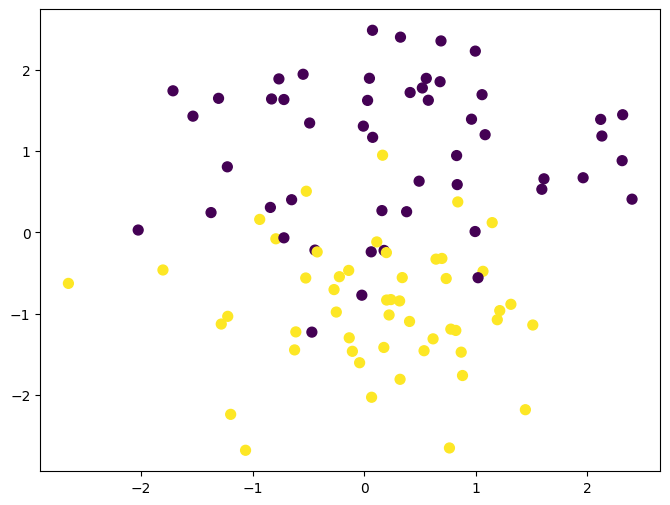

In [63]:
# Генерируем синтетические данные с линейно разделимыми классами
X, y = make_classification(n_samples=100, n_classes=2, random_state=42)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y,  s=50);

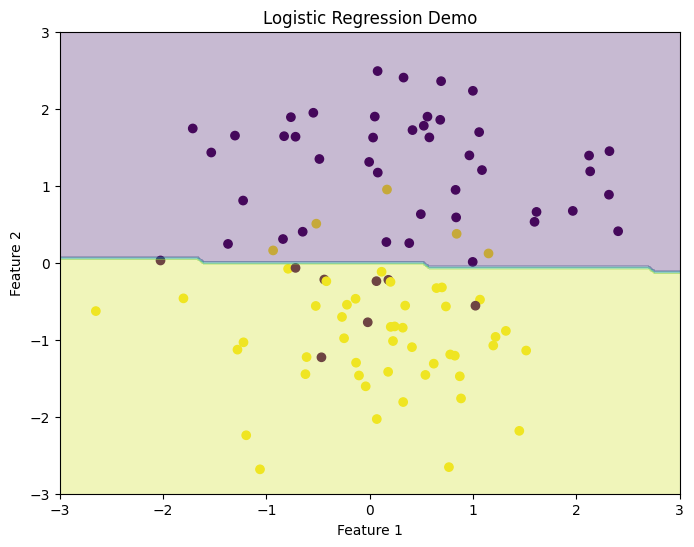

In [55]:

# Создаем экземпляр модели логистической регрессии
model = LogisticRegression()

# Обучаем модель на данных
model.fit(X[:,[0,1]], y)

# Визуализируем данные и границу принятия решений
plt.figure(figsize=(8, 6))

# Визуализируем точки данных
plt.scatter(X[:, 0], X[:, 1], c=y)

# Создаем сетку для визуализации границы принятия решений
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Визуализируем границу принятия решений
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Demo')
plt.show()


In [50]:
y_pred = model.predict(X[:,[0,1]])
print(accuracy_score(y, y_pred))
print(f1_score(y_pred, y))

0.44
0.4716981132075472


In [64]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X[:,[0,1]], y)
y_pred_dt = dt.predict(X[:,[0,1]])

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y):.2f}")
print(f"Decision tree f1_score: {f1_score(y_pred_dt, y):.2f}")
print(f"Decision tree MSE: {mean_squared_error(y_pred_dt, y):.2f}")

Decision tree accuracy: 1.00
Decision tree f1_score: 1.00
Decision tree MSE: 0.00


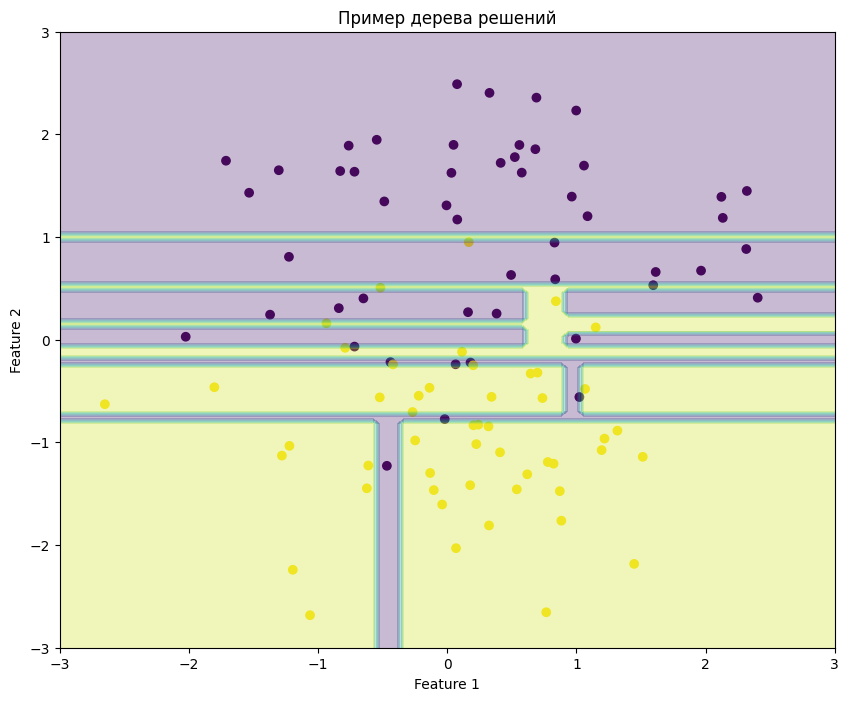

In [66]:
# Визуализируем точки данных
plt.scatter(X[:, 0], X[:, 1], c=y)

# Создаем сетку для визуализации границы принятия решений
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])

# Визуализируем границу принятия решений
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Пример дерева решений')
plt.show()

# Сравнение с деревом решений

In [67]:
# фиксируем для вопроизводимости
my_random_state = 12345

In [68]:
# сгенерим данные
np.random.seed(my_random_state)
n = 100
X = np.zeros(shape=(n, 2))
# X

In [69]:
X[:, 0] = np.linspace(-5, 5, n)
X

array([[-5.        ,  0.        ],
       [-4.8989899 ,  0.        ],
       [-4.7979798 ,  0.        ],
       [-4.6969697 ,  0.        ],
       [-4.5959596 ,  0.        ],
       [-4.49494949,  0.        ],
       [-4.39393939,  0.        ],
       [-4.29292929,  0.        ],
       [-4.19191919,  0.        ],
       [-4.09090909,  0.        ],
       [-3.98989899,  0.        ],
       [-3.88888889,  0.        ],
       [-3.78787879,  0.        ],
       [-3.68686869,  0.        ],
       [-3.58585859,  0.        ],
       [-3.48484848,  0.        ],
       [-3.38383838,  0.        ],
       [-3.28282828,  0.        ],
       [-3.18181818,  0.        ],
       [-3.08080808,  0.        ],
       [-2.97979798,  0.        ],
       [-2.87878788,  0.        ],
       [-2.77777778,  0.        ],
       [-2.67676768,  0.        ],
       [-2.57575758,  0.        ],
       [-2.47474747,  0.        ],
       [-2.37373737,  0.        ],
       [-2.27272727,  0.        ],
       [-2.17171717,

In [70]:
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
X

array([[-5.        , -5.10235383],
       [-4.8989899 , -4.65951823],
       [-4.7979798 , -5.05769916],
       [-4.6969697 , -4.97483485],
       [-4.5959596 , -3.61306931],
       [-4.49494949, -3.79824658],
       [-4.39393939, -4.34748546],
       [-4.29292929, -4.15205622],
       [-4.19191919, -3.80740791],
       [-4.09090909, -3.46769172],
       [-3.98989899, -3.48630431],
       [-3.88888889, -4.53699944],
       [-3.78787879, -3.65038297],
       [-3.68686869, -3.57241225],
       [-3.58585859, -2.90940017],
       [-3.48484848, -3.04163381],
       [-3.38383838, -4.38465704],
       [-3.28282828, -3.46874955],
       [-3.18181818, -2.34730553],
       [-3.08080808, -3.30009295],
       [-2.97979798, -3.2496687 ],
       [-2.87878788, -2.64029537],
       [-2.77777778, -1.15330582],
       [-2.67676768, -3.18738144],
       [-2.57575758, -2.86430123],
       [-2.47474747, -2.41268684],
       [-2.37373737, -2.22243059],
       [-2.27272727, -2.01084124],
       [-2.17171717,

In [71]:
y = (X[:, 1] > X[:, 0]).astype(int)
y

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

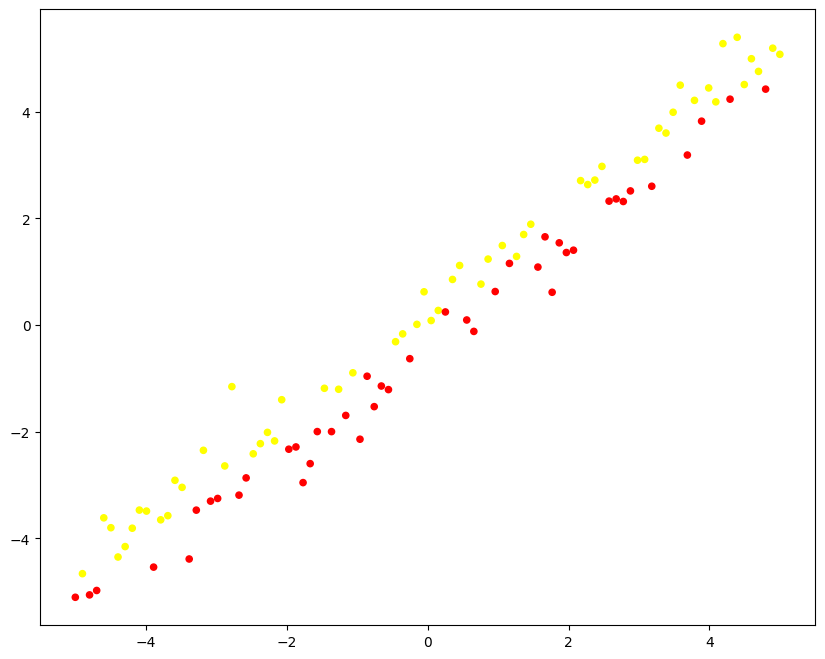

In [72]:
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, cmap="autumn")
plt.show()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=my_random_state)

lr = LogisticRegression(random_state=my_random_state)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Accuracy логистическая регрессии: {round(accuracy_score(y_pred_lr, y_test),2)}")
print(f"логистическая регрессии MSE: {mean_squared_error(y_pred_lr, y_test):.2f}")

Accuracy логистическая регрессии: 0.9
логистическая регрессии MSE: 0.10


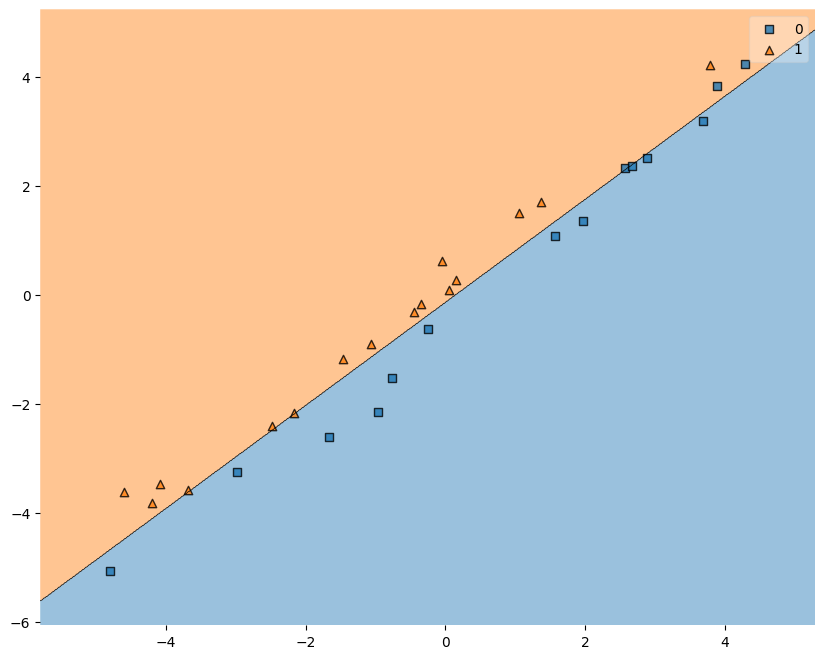

In [74]:
plot_decision_regions(X_test, y_test, lr);

In [85]:
dt = DecisionTreeClassifier(random_state=my_random_state, max_depth=7)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")
print(f"Decision tree MSE: {mean_squared_error(y_pred_dt, y_test):.2f}")

Decision tree accuracy: 0.70
Decision tree MSE: 0.30


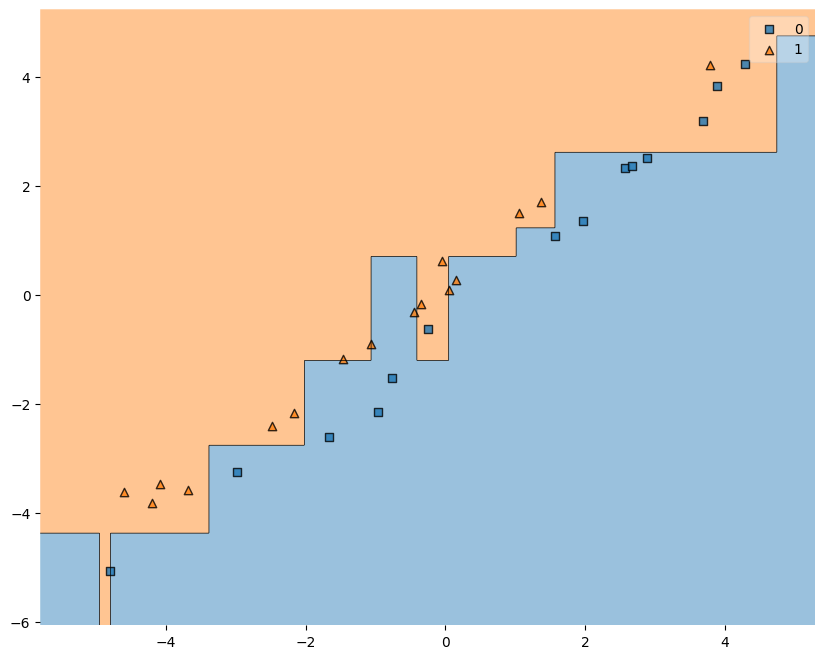

In [86]:
plot_decision_regions(X_test, y_test, dt);